In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)
import matplotlib.pyplot as plt
import multiprocessing as mp

In [2]:
data_path = "../data/"
file_paths = [data_path+i for i in os.listdir(data_path)]
file_paths

['../data/Data_Demo_Uncrambl - 8.csv',
 '../data/Data_Demo_Uncrambl - 11.csv',
 '../data/Data_Demo_Uncrambl - 10.csv',
 '../data/Data_Demo_Uncrambl - 2.csv',
 '../data/Data_Demo_Uncrambl - 3.csv',
 '../data/Data_Demo_Uncrambl - 7.csv',
 '../data/Data_Demo_Uncrambl - 12.csv',
 '../data/Data_Demo_Uncrambl - 9.csv',
 '../data/Data_Demo_Uncrambl - 4.csv',
 '../data/Data_Demo_Uncrambl - 1.csv',
 '../data/Data_Demo_Uncrambl - 6.csv',
 '../data/Data_Demo_Uncrambl - 5.csv']

In [3]:
#load the data
df_raw = pd.concat([pd.read_csv(i) for i in file_paths])\
       .reset_index(drop=True)
print(df_raw.shape)

/home/paul/anaconda3/envs/py2env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,9,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(67388, 34)


In [4]:
df = df_raw.copy()

# make the datetime columns to datetime format
df["GRN Date"] = pd.to_datetime(df["GRN Date"])
df["NEED_BY_DATE"] = pd.to_datetime(df["NEED_BY_DATE"])
df["PO Creation Date"] = pd.to_datetime(df["PO Creation Date"])
df["PO approval Date"] = pd.to_datetime(df["PO approval Date"])
df["GATE_ENTRY_DT"] = pd.to_datetime(df["GATE_ENTRY_DT"])
df["GATE_ENTRY_DT_Rev."] = pd.to_datetime(df["GATE_ENTRY_DT_Rev."])
df["EXCISE_INVOICE_DATE"] = pd.to_datetime(df["EXCISE_INVOICE_DATE"])


# change the datatype for numerical columns
df["QTY"] = pd.to_numeric(df["QTY"].str.replace(",", ""))
df["PO_UNIT_PRICE"] = pd.to_numeric(df["PO_UNIT_PRICE"].str.replace(",", ""))
df["VAL_IN_INR"] = pd.to_numeric(df["VAL_IN_INR"].str.replace(",", ""))
df["TAX"] = pd.to_numeric(df["TAX"].str.replace(",", ""))
df["TOT_AMT"] = pd.to_numeric(df["TOT_AMT"].str.replace(",", ""))

df.head()

,GRN No#,GRN Date,NEED_BY_DATE,ITEM,ITEM_DESC,ITEM_TYPE,ITEM_REV,DIRECT_ITEM,QTY,CORRECTION,PO_UNIT_PRICE,VAL_IN_INR,UOM,SUPPLIER,GATE_ENTRY_NO,GATE_ENTRY_DT,GATE_ENTRY_DT_Rev.,CURRENCY_CODE,CURRENCY_CONVERSION_RATE,FREIGHT_IN_INR,FRT_CURR,EXCISE_INVOICE_NO,EXCISE_INVOICE_DATE,TAX,RECORAVABLE_TAX,TOT_AMT,PO_NUM,PO_TYPE,PO Creation Date,PO approval Date,PO_REL_NUM,BUYER,AUTHORIZATION_STATUS,APPROVED_BY
0,99300115,2018-06-01,2018-05-20,Z000000922,D.M.Water,PID,0,NaN,2000.0,NaN,0.6,1200.0,Litre,SRI KRISHNA WATER SUPPLY,1311,2018-06-01 15:07:20,2018-06-01,INR,1.0,0,NaN,031/18-19,2018-06-01,216.0,216.00,1200.0,9210641,STANDARD,2018-05-09,2018-05-10,NaN,MGN,APPROVED,BW
1,99300116,2018-06-01,2018-05-30,Z500000487,"METAL HALIDE LAMP, 250 WATTS, SCREW TYPE, 240V...",PID,0,NaN,15.0,NaN,615.0,9225.0,Each,M.C.GOTAWAT ELECTRICALS,1214,2018-06-01 15:35:06,2018-06-01,INR,1.0,0,NaN,MCGE/18-19/0395,2018-05-31,1661.0,"1,661.00",9225.0,9210982,STANDARD,2018-05-25,2018-05-30,NaN,MGN,APPROVED,BW
2,99300116,2018-06-01,2018-05-30,Z500000702,"BALLAST FOR SON 250W BULB 250W, 240V MAKE:CROM...",PID,0,NaN,5.0,NaN,910.0,4550.0,Each,M.C.GOTAWAT ELECTRICALS,1214,2018-06-01 15:35:06,2018-06-01,INR,1.0,0,NaN,MCGE/18-19/0395,2018-05-31,819.0,819.00,4550.0,9210982,STANDARD,2018-05-25,2018-05-30,NaN,MGN,APPROVED,BW
3,99300116,2018-06-01,2018-05-31,Z500000487,"METAL HALIDE LAMP, 250 WATTS, SCREW TYPE, 240V...",PID,0,NaN,15.0,NaN,615.0,9225.0,Each,M.C.GOTAWAT ELECTRICALS,1214,2018-06-01 15:35:06,2018-06-01,INR,1.0,0,NaN,MCGE/18-19/0395,2018-05-31,1661.0,"1,661.00",9225.0,9210982,STANDARD,2018-05-25,2018-05-30,NaN,MGN,APPROVED,BW
4,99300116,2018-06-01,2018-05-31,Z500000702,"BALLAST FOR SON 250W BULB 250W, 240V MAKE:CROM...",PID,0,NaN,5.0,NaN,910.0,4550.0,Each,M.C.GOTAWAT ELECTRICALS,1214,2018-06-01 15:35:06,2018-06-01,INR,1.0,0,NaN,MCGE/18-19/0395,2018-05-31,819.0,819.00,4550.0,9210982,STANDARD,2018-05-25,2018-05-30,NaN,MGN,APPROVED,BW


1. Same item procured at different rate in same PO (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM”)
2. Same item procured at different rate in different PO created on same date and same vendor irrespective of creator and approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)
3. Same item procured at different rate in different PO created on same date and same vendor by Same creator (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER”)
4. Same item procured at different rate in different PO created on same date and same vendor by Same creator and same approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER” and Column AH “APPROVED_BY”)
5. Same item procured at different rate in different PO created on same date and different vendor (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)
6. Same item procured at different rate in different PO approved on same date (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AD “PO approval Date” and Column N “SUPPLIER”)
7. Item procured through standard PO created at higher rate than open blanket PO at lower rate. (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AB “PO_TYPE” and Column N “SUPPLIER”)
8. Variances in GRN date and Gate entry date – Trend of Long delay in making GRNs (Refer Column Q “GATE_ENTRY_DT”  and Column B “GRN Date” and Column N “SUPPLIER”)
9. Trend of PO Regularisation – Invoice date post PO creation date (Refer Column W “EXCISE_INVOICE_DATE”  and Column AC “PO Creation Date” and Column N “SUPPLIER”)
10. Variances in Gate entry date and Invoice date – Trend of Long delay inwards of material (Refer Column Q “GATE_ENTRY_DT”  and Column W “EXCISE_INVOICE_DATE”  and Column N “SUPPLIER”)
11. Duplicate GRN for same invoices (Refer Column B “GRN Date” and Column W “EXCISE_INVOICE_DATE” and Column N “SUPPLIER”)
12. Blanket and Standard PO created and approved on Same date to same supplier for same item (Refer Column D “ITEM” and Column AB “PO_TYPE” and Column N “SUPPLIER” and Column AC “PO Creation Date”)

#### Definition of Terms
1. GRN - Goods Receipt Note
2. PO - Purchase Order

### 1. Same item procured at different rate in same PO (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM”)

In [5]:
df1 = df.groupby(["ITEM", "PO_NUM"])\
        .apply(lambda x: pd.Series([x["PO_UNIT_PRICE"].values],
                                   index=["PO_UNIT_PRICE"]))
df1_bool = df1["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1)
df1 = df1[df1_bool]
print(df1.shape)


#get the unique PO_UNIT_PRICE
df1 = pd.DataFrame(df1["PO_UNIT_PRICE"].apply(lambda x: np.unique(x)))
df1.head()

(1359, 1)


,,PO_UNIT_PRICE
ITEM,PO_NUM,
103076,9214741,"[5.0, 6.2]"
105238,9214741,"[4.0, 5.0]"
106168,9214741,"[20.0, 40.0]"
106175,9214741,"[5.8, 8.0, 500.0]"
1367001_R-00,9310562,"[9967.0, 10239.8]"


In [6]:
#top items with a lot of purchase orders
pd.value_counts(df1.index.get_level_values(0)).head(10)

MAINTENANCE SPARES           375
REPAIRS AND RECTIFICATION    120
LOOSE TOOLS                   91
WELFARE ITEMS                 79
CUSTOMER ASSETS               66
STATIONARY                    49
BUILDING MAINT ITEMS          45
PROFESSIONAL SERVICES         40
GENERAL STORES OTHERS         38
FLEXI STAFF                   27
Name: ITEM, dtype: int64

count    1359.000000
mean        4.218543
std         4.098932
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        37.000000
Name: PO_UNIT_PRICE, dtype: float64


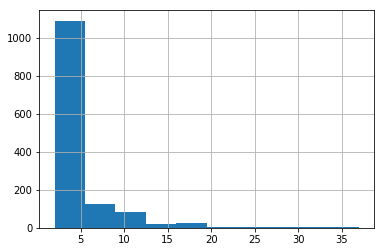

In [7]:
#descriptives 
df1_num_unique = df1["PO_UNIT_PRICE"].apply(lambda x: len(x))
print(df1_num_unique.describe())
df1_num_unique.hist()

                                                                PO_UNIT_PRICE
ITEM               PO_NUM                                                    
MAINTENANCE SPARES 9111303  [99.0, 120.0, 121.0, 144.0, 162.0, 167.0, 169....


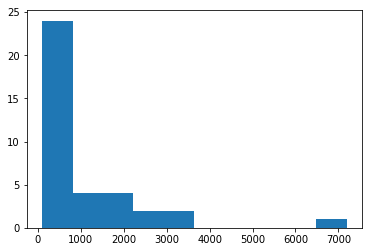

In [8]:
#let's look at the item with the most varied PO_UNIT_PRICE
item_max = df1[df1_num_unique==max(df1_num_unique)]
print(item_max)
_ = plt.hist(item_max["PO_UNIT_PRICE"][0])

### 2. Same item procured at different rate in different PO created on same date and same vendor irrespective of creator and approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)

In [9]:
df2 = df.groupby(["ITEM", "PO Creation Date", "SUPPLIER"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df2_bool = (df2["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df2["PO_NUM"].apply(lambda x: len(np.unique(x))>1))
df2 = df2[df2_bool]

#drop duplicates 
df2 = \
df2.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE"]))
print(df2.shape)
df2.head()

(182, 2)


,,,PO_NUM,PO_UNIT_PRICE
ITEM,PO Creation Date,SUPPLIER,,
4014022572,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[620.0, 539.0]"
4062022000,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[2221.0, 1931.0]"
4062022115,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[890.0, 774.0]"
4062022173,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[1112.0, 967.0]"
4062022204,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[1574.0, 1368.0]"


### 3. Same item procured at different rate in different PO created on same date and same vendor by Same creator (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER”)

In [10]:
df3 = df.groupby(["ITEM", "PO Creation Date", "SUPPLIER", "BUYER"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df3_bool = (df3["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df3["PO_NUM"].apply(lambda x: len(np.unique(x))>1))
df3 = df3[df3_bool]

#drop duplicates 
df3 = \
df3.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE"]))
print(df3.shape)
df3.head()

(166, 2)


,,,,PO_NUM,PO_UNIT_PRICE
ITEM,PO Creation Date,SUPPLIER,BUYER,,
4014022572,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[620.0, 539.0]"
4062022000,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[2221.0, 1931.0]"
4062022115,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[890.0, 774.0]"
4062022173,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[1112.0, 967.0]"
4062022204,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[1574.0, 1368.0]"


### 4. Same item procured at different rate in different PO created on same date and same vendor by Same creator and same approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER” and Column AH “APPROVED_BY”)

In [11]:
df4 = df.groupby(["ITEM", "PO Creation Date", "SUPPLIER", "BUYER", "APPROVED_BY"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df4_bool = (df4["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df4["PO_NUM"].apply(lambda x: len(np.unique(x))>1))
df4 = df4[df4_bool]

#drop duplicates 
df4 = \
df4.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE"]))
print(df4.shape)
df4.head()

(154, 2)


,,,,,PO_NUM,PO_UNIT_PRICE
ITEM,PO Creation Date,SUPPLIER,BUYER,APPROVED_BY,,
4014022572,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[620.0, 539.0]"
4062022000,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[2221.0, 1931.0]"
4062022115,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[890.0, 774.0]"
4062022173,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[1112.0, 967.0]"
4062022204,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[1574.0, 1368.0]"


### 5. Same item procured at different rate in different PO created on same date and different vendor (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)

In [12]:
df5 = df.groupby(["ITEM", "PO Creation Date"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values,
                                    x["SUPPLIER"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df5_bool = (df5["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df5["PO_NUM"].apply(lambda x: len(np.unique(x))>1) &
            df5["SUPPLIER"].apply(lambda x: len(np.unique(x))>1))
df5 = df5[df5_bool]


#drop duplicates 
df5 = \
df5.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"]),
                               pd.Series(x["SUPPLIER"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values, x[2].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))
print(df5.shape)
df5.head()

(549, 3)


,,PO_NUM,PO_UNIT_PRICE,SUPPLIER
ITEM,PO Creation Date,,,
23045247,2019-01-10,"[9213958, 9213972]","[72.34, 0.92]","[BALAJI ENTERPRISES., TKT SALES]"
29523167-20,2018-08-22,"[9212314, 9212304]","[25000.0, 2521.0]","[JEEVA INDUSTRIES, VEE J PEE ALUMINIUM FOUNDRY..."
32X100727,2018-05-17,"[9310536, 9310534]","[385.0, 442.75]","[TEKPAK, MANAV PACKAGING PRIVATE LIMITED]"
32X100733,2018-05-17,"[9310534, 9310536]","[486.45, 400.0]","[MANAV PACKAGING PRIVATE LIMITED, TEKPAK]"
3502121210,2018-04-07,"[9210069, 9210060]","[850.0, 950.0]","[MOTION TECHNOLOGIES, BILVA TECHNOLOGIES PRIVA..."


### 6. Same item procured at different rate in different PO approved on same date (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AD “PO approval Date” and Column N “SUPPLIER”)

In [13]:
df6 = df.groupby(["ITEM", "PO approval Date"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values,
                                    x["SUPPLIER"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df6_bool = (df6["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df6["PO_NUM"].apply(lambda x: len(np.unique(x))>1) &
            df6["SUPPLIER"].apply(lambda x: len(np.unique(x))>1))
df6 = df6[df6_bool]

#drop duplicates 
df6 = \
df6.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"]),
                               pd.Series(x["SUPPLIER"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values, x[2].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))
print(df6.shape)
df6.head()

(536, 3)


,,PO_NUM,PO_UNIT_PRICE,SUPPLIER
ITEM,PO approval Date,,,
23045247,2019-01-18,"[9213958, 9213972]","[72.34, 0.92]","[BALAJI ENTERPRISES., TKT SALES]"
32X100938,2019-01-08,"[9310535, 9312915]","[390.0, 392.0]","[TEKPAK, JAI MARUTHI INDUSTRIES]"
32X100939,2019-01-08,"[9310535, 9312915]","[472.0, 470.0]","[TEKPAK, JAI MARUTHI INDUSTRIES]"
6756041,2018-06-21,"[9211362, 9211443]","[8.5, 591.64]","[SADGURU MIDDLE EAST FZE, SETLITE ENGINEERS LI..."
6836419,2018-04-16,"[8215072, 9210029]","[250.0, 278.0]","[SRI GANESH INDUSTRIES, PEENYA FINE COMP PRIVA..."


### 7. Item procured through standard PO created at higher rate than open blanket PO at lower rate. (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AB “PO_TYPE” and Column N “SUPPLIER”)

In [14]:
df7 = df.groupby(["ITEM", "PO_TYPE"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values,
                                    x["SUPPLIER"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))\
        .unstack("PO_TYPE")

#drop all items that don't have both blanket and standard PO_TYPE info
df7_bool = df7.notnull().all(axis=1)
df7 = df7[df7_bool]
print(df7.shape)
df7.head()

(649, 6)


PO_NUM                                        \
PO_TYPE                BLANKET                              STANDARD   
ITEM                                                                   
0280512500  [9112485, 9112460]  [9112011, 9111372, 9111373, 9112005]   
0286506160  [9112485, 9112460]  [9112011, 9111372, 9111373, 9112005]   
0911801120  [9112485, 9112460]  [9112011, 9111372, 9111373, 9112005]   
100011               [8210506]                             [9211601]   
100012               [8210506]                             [9211601]   

           PO_UNIT_PRICE                            \
PO_TYPE          BLANKET                  STANDARD   
ITEM                                                 
0280512500  [24.0, 24.0]  [24.0, 24.0, 24.0, 24.0]   
0286506160  [10.0, 10.0]  [10.0, 10.0, 10.0, 10.0]   
0911801120  [20.0, 20.0]  [20.0, 20.0, 20.0, 20.0]   
100011            [2.85]                     [3.6]   
100012            [3.66]                     [3.9]   

                                                SUPPLIER  \
PO_TYPE                                          BLANKET   
ITEM                                                       
0280512500  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED]   
0286506160  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED]   
0911801120  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED]   
100011                               [LAKSHMI FASTENERS]   
100012                               [LAKSHMI FASTENERS]   

                                                               
PO_TYPE                                              STANDARD  
ITEM                                                           
0280512500  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED, I...  
0286506160  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED, I...  
0911801120  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED, I...  
100011      [WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...  
100012      [WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...

In [15]:
#only get rows where the mean of PO_UNIT_PRICE for standard is greater than mean of PO_UNIT_PRICE for blanket
df7.columns = [i for i in df7.columns]

In [16]:
df7[(u'PO_UNIT_PRICE_MEAN', u'BLANKET')] = df7[(u'PO_UNIT_PRICE', u'BLANKET')].apply(lambda x: np.mean(x))
df7[(u'PO_UNIT_PRICE_MEAN', u'STANDARD')] = df7[(u'PO_UNIT_PRICE', u'STANDARD')].apply(lambda x: np.mean(x))

In [17]:
df7 = df7[df7[(u'PO_UNIT_PRICE_MEAN', u'BLANKET')]<df7[(u'PO_UNIT_PRICE_MEAN', u'STANDARD')]]
print(df7.shape)
df7.head(10)

(173, 8)


,"(PO_NUM, BLANKET)","(PO_NUM, STANDARD)","(PO_UNIT_PRICE, BLANKET)","(PO_UNIT_PRICE, STANDARD)","(SUPPLIER, BLANKET)","(SUPPLIER, STANDARD)","(PO_UNIT_PRICE_MEAN, BLANKET)","(PO_UNIT_PRICE_MEAN, STANDARD)"
ITEM,,,,,,,,
100011,[8210506],[9211601],[2.85],[3.6],[LAKSHMI FASTENERS],[WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...,2.850000,3.600000
100012,[8210506],[9211601],[3.66],[3.9],[LAKSHMI FASTENERS],[WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...,3.660000,3.900000
1000762-00,"[9210009, 9210009]",[9210142],"[1948.1, 1948.1]",[2445.3],"[NAETEK FERROCASTINGS PRIVATE LIMITED, NAETEK ...",[NAETEK FERROCASTINGS PRIVATE LIMITED],1948.100000,2445.300000
1002681-00,"[9210018, 9210018, 9210018, 9210018, 9210018, ...","[9210143, 9210143, 9210143, 9210143]","[2061.0, 2061.0, 2061.0, 2061.0, 2061.0, 2061....","[2127.0, 2127.0, 2127.0, 2127.0]","[BEST CAST IT LIMITED, BEST CAST IT LIMITED, B...","[BEST CAST IT LIMITED, BEST CAST IT LIMITED, B...",2061.000000,2127.000000
103321,"[9210609, 9210609, 9210609]",[9212350],"[0.02, 0.02, 0.02]",[0.48],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.020000,0.480000
103325,"[9210609, 9210609, 9210609]",[9212350],"[0.06, 0.06, 0.06]",[1.55],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.060000,1.550000
119096,"[9110949, 8110155, 8110155, 8110155, 9110949, ...","[9110809, 9110880, 9110880, 9110880]","[1.76, 1.16, 1.16, 1.16, 1.76, 1.76, 1.76, 1.7...","[2.7, 1.76, 1.76, 1.76]","[SHASHANK ENTERPRISES, KALISMA STEEL PRIVATE L...","[SAIFY TOOLS CENTRE, SHASHANK ENTERPRISES, SHA...",1.618824,1.995000
120383,"[9210609, 9210609, 9210609]",[9212350],"[0.06, 0.06, 0.06]",[0.74],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.060000,0.740000
120384,"[9210609, 9210609, 9210609]",[9212350],"[0.06, 0.06, 0.06]",[1.06],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.060000,1.060000


### 8. Variances in GRN date and Gate entry date – Trend of Long delay in making GRNs (Refer Column Q “GATE_ENTRY_DT” and Column B “GRN Date” and Column N “SUPPLIER”)

In [19]:
df["delay"] = (df["GRN Date"] - df["GATE_ENTRY_DT_Rev."])

In [20]:
#average delay per gate entry date
ave_delay = df.groupby("GATE_ENTRY_DT_Rev.").apply(lambda x: x["delay"].mean()).sort_index()

In [26]:
df_raw.head()

,GRN No#,GRN Date,NEED_BY_DATE,ITEM,ITEM_DESC,ITEM_TYPE,ITEM_REV,DIRECT_ITEM,QTY,CORRECTION,PO_UNIT_PRICE,VAL_IN_INR,UOM,SUPPLIER,GATE_ENTRY_NO,GATE_ENTRY_DT,GATE_ENTRY_DT_Rev.,CURRENCY_CODE,CURRENCY_CONVERSION_RATE,FREIGHT_IN_INR,FRT_CURR,EXCISE_INVOICE_NO,EXCISE_INVOICE_DATE,TAX,RECORAVABLE_TAX,TOT_AMT,PO_NUM,PO_TYPE,PO Creation Date,PO approval Date,PO_REL_NUM,BUYER,AUTHORIZATION_STATUS,APPROVED_BY
0,99300115,01-JUN-18,20-MAY-18,Z000000922,D.M.Water,PID,0,NaN,"2,000.00",NaN,0.60,"1,200.00",Litre,SRI KRISHNA WATER SUPPLY,1311,2018/06/01 15:07:20,1-Jun-18,INR,1.0,0,NaN,031/18-19,1-Jun-18,216.00,216.00,"1,200.00",9210641,STANDARD,9-May-18,10-May-18,NaN,MGN,APPROVED,BW
1,99300116,01-JUN-18,30-MAY-18,Z500000487,"METAL HALIDE LAMP, 250 WATTS, SCREW TYPE, 240V...",PID,0,NaN,15.00,NaN,615.00,"9,225.00",Each,M.C.GOTAWAT ELECTRICALS,1214,2018/06/01 15:35:06,1-Jun-18,INR,1.0,0,NaN,MCGE/18-19/0395,31-May-18,"1,661.00","1,661.00","9,225.00",9210982,STANDARD,25-May-18,30-May-18,NaN,MGN,APPROVED,BW
2,99300116,01-JUN-18,30-MAY-18,Z500000702,"BALLAST FOR SON 250W BULB 250W, 240V MAKE:CROM...",PID,0,NaN,5.00,NaN,910.00,"4,550.00",Each,M.C.GOTAWAT ELECTRICALS,1214,2018/06/01 15:35:06,1-Jun-18,INR,1.0,0,NaN,MCGE/18-19/0395,31-May-18,819.00,819.00,"4,550.00",9210982,STANDARD,25-May-18,30-May-18,NaN,MGN,APPROVED,BW
3,99300116,01-JUN-18,31-MAY-18,Z500000487,"METAL HALIDE LAMP, 250 WATTS, SCREW TYPE, 240V...",PID,0,NaN,15.00,NaN,615.00,"9,225.00",Each,M.C.GOTAWAT ELECTRICALS,1214,2018/06/01 15:35:06,1-Jun-18,INR,1.0,0,NaN,MCGE/18-19/0395,31-May-18,"1,661.00","1,661.00","9,225.00",9210982,STANDARD,25-May-18,30-May-18,NaN,MGN,APPROVED,BW
4,99300116,01-JUN-18,31-MAY-18,Z500000702,"BALLAST FOR SON 250W BULB 250W, 240V MAKE:CROM...",PID,0,NaN,5.00,NaN,910.00,"4,550.00",Each,M.C.GOTAWAT ELECTRICALS,1214,2018/06/01 15:35:06,1-Jun-18,INR,1.0,0,NaN,MCGE/18-19/0395,31-May-18,819.00,819.00,"4,550.00",9210982,STANDARD,25-May-18,30-May-18,NaN,MGN,APPROVED,BW
